## Gradient Boosting Implementation 

This is the Gradient Boosting implementation of Boston data from UCI.

### Import Libraries 

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

### Load Data 

In [108]:
boston = load_boston()

In [109]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [110]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.Series(boston.target)

In [111]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

### Train and Test Split 

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Train the Model 

In [114]:
GB_Model = GradientBoostingRegressor()

In [115]:
GB_Model.fit(X_train,y_train)

GradientBoostingRegressor()

### Test the Model 

In [116]:
y_pred = GB_Model.predict(X_test)

### Model Evaluation 

In [117]:
r2_score(y_test,y_pred)

0.8453091515935394

### We can also plot Feature Importance 

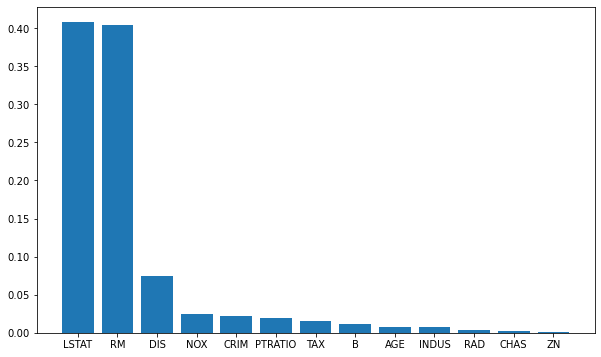

In [126]:
Feature_Imp = pd.concat([pd.DataFrame(data=boston.feature_names,columns=['Variable']),pd.DataFrame(data=GB_Model.feature_importances_,columns=['Importance'])],axis=1)

Feature_Imp.sort_values(by='Importance',ascending=False,inplace=True)
Feature_Imp.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,6))
plt.bar(Feature_Imp['Variable'],Feature_Imp['Importance'],width=0.8)
plt.show()

In [127]:
# Alternate Method of plotting Importance plot

# feature_importance = 100 * (feature_importance/feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0])+0.5
# plt.barh(pos,feature_importance[sorted_idx],align='center')
# plt.yticks(pos,boston.feature_names[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

### Hyperparamter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param = {'learning_rate':[0.20,0.15,0.1,0.05],
      'n_estimators':[100,150,200,250],
      'max_depth':[3,4,5,6],
      'criterion':['friedman_mse', 'mse', 'mae'],
       'max_features':['auto', 'sqrt', 'log2']
      }

Model_Tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param,scoring='r2')
Model_Tuning.fit(X_train,y_train)
Model_Tuning.best_params_,Model_Tuning.best_score_

({'criterion': 'mae',
  'learning_rate': 0.1,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 100},
 0.8857523973724281)

In [135]:
final_Model = GradientBoostingRegressor(criterion='mae',learning_rate=0.1,max_depth=5,max_features='sqrt',n_estimators=100)

In [136]:
final_Model.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mae', max_depth=5, max_features='sqrt')

In [137]:
y_pred = final_Model.predict(X_test)

In [141]:
r2_score(y_test,y_pred)

0.8614326059451076

As you can see the accuracy of the Model has increased by using hyperparameter tuning.